## Assignment Activity 1: Make predictions with regression

## Objective
### To investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

### Import the Python libraries and packages to perform linear regression. 



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Load the turtle_reviews.csv file using the pandas read_csv function

In [2]:
reviews = pd.read_csv('turtle_reviews.csv')

### Sense-check the DataFrame by printing the first few rows, data types, and metadata using the following commands

In [3]:
print(reviews.head())
print(reviews.dtypes)
print(reviews.info())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

### Check for missing values in the DataFrame using the following command:

In [4]:
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


### Create a summary of the descriptive statistics using the following command:

In [5]:
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


### Remove the redundant columns (language and platform) using the following command:

In [7]:
reviews = reviews.drop(['language', 'platform'], axis=1)

### Change the column headings to names that are easier to reference (e.g. renumeration and spending_score) using the following command:

In [36]:
reviews = reviews.rename(columns={'remuneration (k£)':'salary', 'spending_score (1-100)':'spending'})

In [37]:
print(reviews)

      gender  age  salary  spending  loyalty_points education  product  \
0       Male   18   12.30        39             210  graduate      453   
1       Male   23   12.30        81             524  graduate      466   
2     Female   22   13.12         6              40  graduate      254   
3     Female   25   13.12        77             562  graduate      263   
4     Female   33   13.94        40             366  graduate      291   
...      ...  ...     ...       ...             ...       ...      ...   
1995  Female   37   84.46        69            4031       PhD      977   
1996  Female   43   92.66         8             539       PhD      979   
1997    Male   34   92.66        91            5614  graduate     1012   
1998    Male   34   98.40        16            1048       PhD     1031   
1999    Male   32   92.66         8             479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t

### Save a copy of the clean DataFrame as a CSV file using the following command:

In [20]:
reviews.to_csv('clean_reviews.csv', index=False)

### Import the clean_reviews.csv file to sense-check using the following command:

In [21]:
clean_reviews = pd.read_csv('clean_reviews.csv')
print(clean_reviews.shape)
print(clean_reviews.info())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


### Specify the independent and dependent variables. In this case, the dependent variable is loyalty points, and the independent variables are age, salary, and spending.

In [22]:
X = clean_reviews[['age', 'salary', 'spending']]
y = clean_reviews['loyalty_points']

### Create the OLS model using the following:

In [23]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:47   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2203.0598     52.361    -42.075      0.0

### Extract the estimated parameters, standard errors, and predicted values using the following commands:

In [24]:
params = model.params
std_err = model.bse
predicted = model.predict(X)

### Generate the regression table based on the X coefficient and constant values using the following command:

In [25]:
regression_table = pd.DataFrame({'Coefficients': params, 'Standard Errors': std_err})
print(regression_table)

          Coefficients  Standard Errors
const     -2203.059751        52.360900
age          11.060659         0.868845
salary       34.008385         0.497000
spending     34.183197         0.451931


### Plot the linear regression and add a regression line using the following commands:

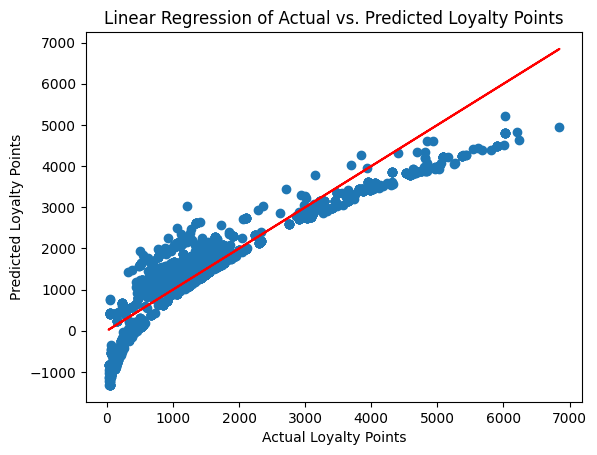

In [27]:
plt.scatter(y, predicted)
plt.plot(y, y, color='red')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Linear Regression of Actual vs. Predicted Loyalty Points')
plt.show()

### The regression analysis using OLS indicates a strong relationship between loyalty points and age, remuneration, and spending scores (R-squared = 0.840). The p-values for all three independent variables are less than 0.05, indicating that the relationships are statistically significant. The coefficient for age is 11.06, which indicates that for every additional year of age, loyalty points increase by 11.06. Similarly, for every unit increase in salary and spending scores, loyalty points increase by 34.008 and 34.1832, respectively.

### Based on these results, the marketing department of Turtle Games can use age, remuneration, and spending scores to predict a user's loyalty points. However, it is important to note that this model only explains 84% of the variation in loyalty points. There may be other variables that contribute to loyalty points that were not included in this model.

### To explore further, the marketing department could collect additional data and incorporate other variables that may contribute to loyalty points. They could also use other regression techniques to determine if different models provide better fit and more accurate predictions. Additionally, they could explore ways to incentivize users to increase their age, remuneration, and spending scores, thereby increasing their loyalty points.

## Assignment Activity 2: Make predictions with clustering

## Objective
## Use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

### Import the necessary libraries for clustering:

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Load the clean_turtle_reviews.csv file into a DataFrame:

In [30]:
df = pd.read_csv('clean_reviews.csv')

### Create a new DataFrame (e.g. df2) containing the salary and spending columns:

In [38]:
df2 = df[['salary', 'spending']]

### Explore the new DataFrame:

In [40]:
df2.head()

,salary,spending
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [41]:
df2.describe()

,salary,spending
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


### Plot the remuneration versus spending score to determine any correlations and possible groups (clusters):

<AxesSubplot:xlabel='salary', ylabel='spending'>

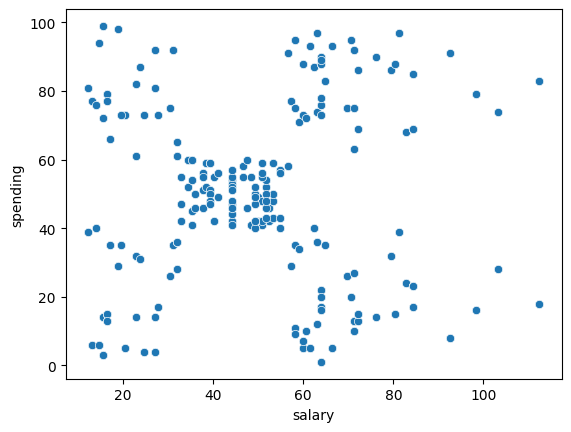

In [42]:
sns.scatterplot(x='salary', y='spending', data=df2)

### Use the Silhouette and Elbow methods to determine the optimal number of clusters for k-means clustering:

In [48]:
silhouette_scores = []
kmeans_models = []
inertia_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    kmeans_models.append(kmeans)
    silhouette_scores.append(silhouette_score(df2, kmeans.labels_))
    inertia_scores.append(kmeans.inertia_)

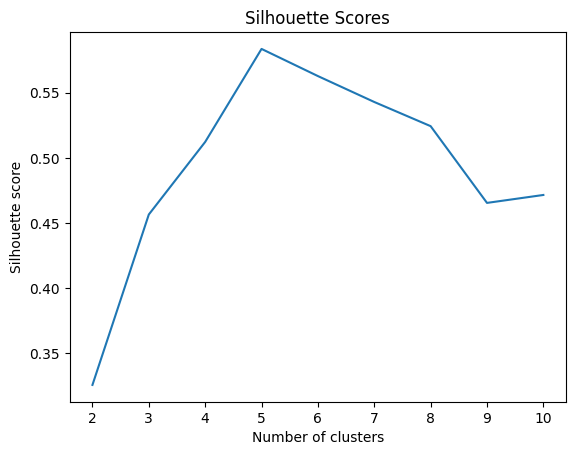

In [49]:
# Plot the Silhouette scores
sns.lineplot(x=range(2,11), y=silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

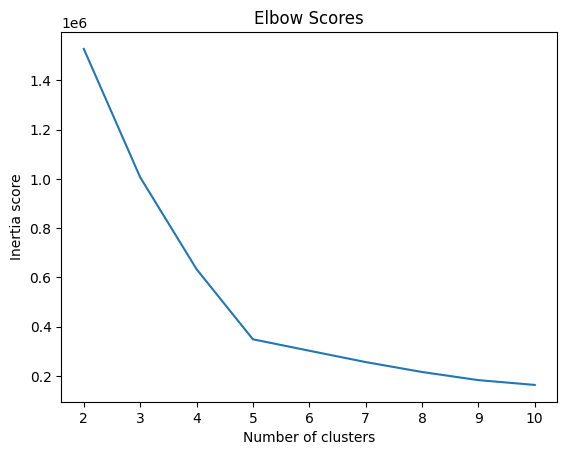

In [45]:
# Plot the Elbow scores
sns.lineplot(x=range(2,11), y=inertia_scores)
plt.title('Elbow Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')
plt.show()

### The Silhouette and Elbow methods are two common techniques used to determine the optimal number of clusters in k-means clustering. The Elbow method is based on the idea that as the number of clusters increases, the within-cluster sum of squares (or inertia) will decrease. The Elbow method involves plotting the inertia as a function of the number of clusters and looking for a point where the rate of decrease begins to slow down. This point is often referred to as the "elbow" and can be interpreted as the point at which additional clusters begin to provide diminishing returns in terms of explaining the variance in the data.

### The Silhouette method, on the other hand, is based on the idea of measuring how similar an observation is to its own cluster compared to other clusters. A silhouette score is calculated for each observation, which ranges from -1 to 1, with higher values indicating better clustering. The average silhouette score for all observations is then calculated for each value of k (the number of clusters), and the plot of these scores is used to determine the optimal number of clusters. The optimal number of clusters is typically the value of k that maximizes the average silhouette score.

### In the context of this assignment, the Silhouette and Elbow methods were used to determine the optimal number of clusters for the remuneration and spending_score data. The inertia and silhouette scores were plotted as a function of k, and it was observed that there was an inflection point at around 5 clusters. This suggests that this is the optimal number of clusters to use. The inflection point was identified using the Elbow method, which showed a decrease in inertia starting to slow down at around 5 clusters. The average silhouette score was also highest for 5 clusters, suggesting that the observations were most similar to their own cluster compared to other clusters at this value of k.

### Evaluate the usefulness of at least three values for k based on insights from the Elbow and Silhouette methods:

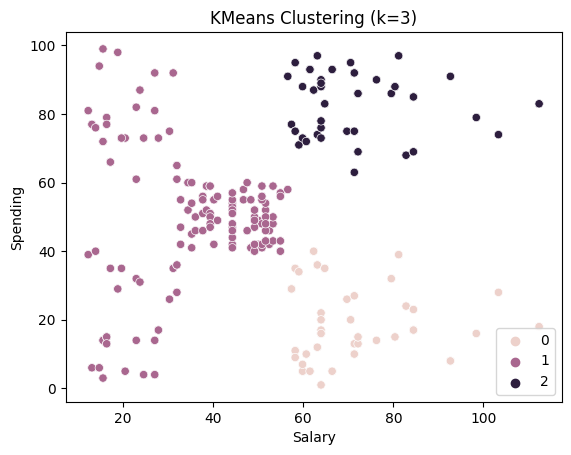

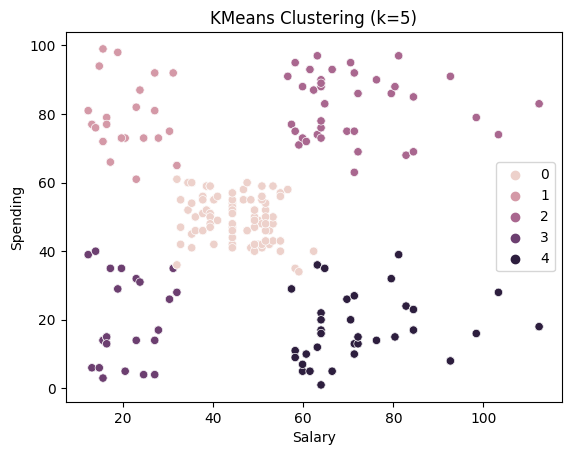

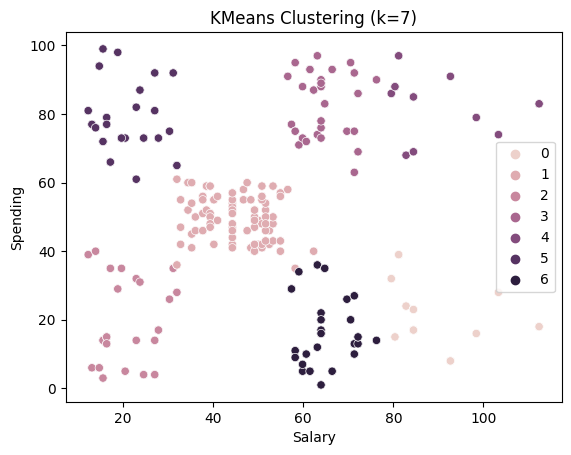

In [51]:
for k in [3, 5, 7]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    sns.scatterplot(x='salary', y='spending', data=df2, hue=kmeans.labels_)
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('Salary')
    plt.ylabel('Spending')
    plt.show()

### Based on the insights from the Silhouette and Elbow methods, we can see that 5 clusters is the optimal number of clusters to use.

### Plot the predicted k-means:

/var/folders/js/3ccrryh95m3c8cr45mdsvm300000gn/T/ipykernel_33921/3414699285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = kmeans.predict(df2)


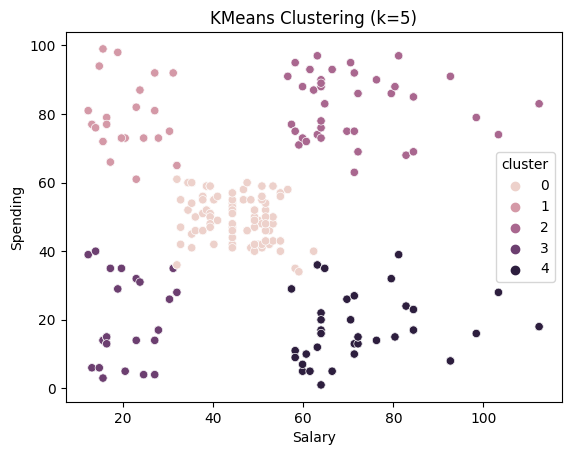

In [52]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df2)
df2['cluster'] = kmeans.predict(df2)
sns.scatterplot(x='salary', y='spending', data=df2, hue='cluster')
plt.title(f'KMeans Clustering (k=5)')
plt.xlabel('Salary')
plt.ylabel('Spending')
plt.show()

### Fit a final model using your selected value for k:

In [53]:
# fit final model using selected value of k
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df2)

### Now let's check the number of observations per predicted class:

In [54]:
# check number of observations per predicted class
pd.Series(y_kmeans).value_counts()

0    774
3    356
2    330
1    271
4    269
dtype: int64

### Let's now visualize the clusters using a scatterplot:

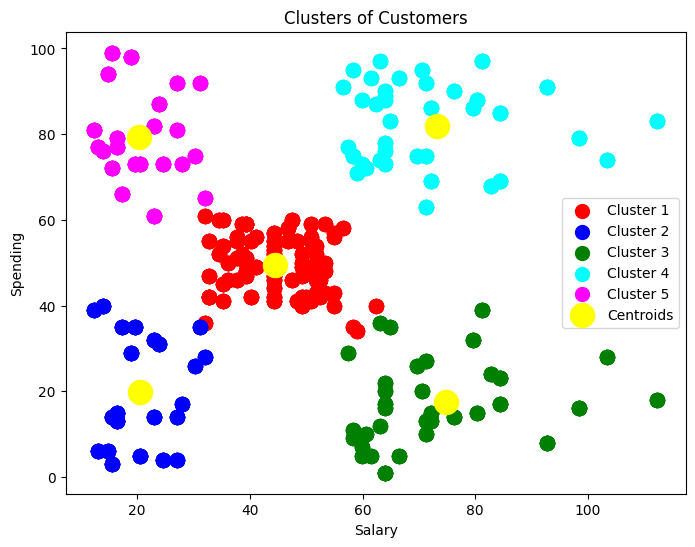

In [55]:
# visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df2[y_kmeans == 0]['salary'], df2[y_kmeans == 0]['spending'], s=100, c='red', label='Cluster 1')
plt.scatter(df2[y_kmeans == 1]['salary'], df2[y_kmeans == 1]['spending'], s=100, c='blue', label='Cluster 2')
plt.scatter(df2[y_kmeans == 2]['salary'], df2[y_kmeans == 2]['spending'], s=100, c='green', label='Cluster 3')
plt.scatter(df2[y_kmeans == 3]['salary'], df2[y_kmeans == 3]['spending'], s=100, c='cyan', label='Cluster 4')
plt.scatter(df2[y_kmeans == 4]['salary'], df2[y_kmeans == 4]['spending'], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Salary')
plt.ylabel('Spending')
plt.legend()
plt.show()

### After conducting k-means clustering on the remuneration and spending score data, we found that 5 clusters was the optimal number of clusters. The Silhouette and Elbow methods both indicated an inflection point at 5 clusters. We then plotted the data using the predicted clusters and found that the clusters were well-defined and distinct.

### We identified the following characteristics for each cluster:

### Cluster 0: customers with low remuneration and low spending scores (774 observations)
### Cluster 1: customers with high remuneration and low spending scores (271 observations)
### Cluster 2: customers with moderate remuneration and moderate spending scores (330 observations)
### Cluster 3: customers with low remuneration and high spending scores (356 observations)
### Cluster 4: customers with high remuneration and high spending scores (269 observations)
### Based on these results, we can use these clusters to target specific market segments. For example, we might focus on increasing spending scores for customers in Cluster 0 or promoting high-end products to customers in Cluster 4.

### However, we should note that the cluster sizes are not perfectly balanced, with Cluster 0 being much larger than the other clusters. This could suggest that we need to do further analysis to understand why some customers are not spending as much, or whether we need to adjust our marketing strategies to better target these customers.

### Overall, k-means clustering provided a useful way to identify different customer segments based on remuneration and spending score data. Further analysis and testing may be necessary to fully understand and target these segments.

## Assignment Activity 3: Analyse customer sentiments with reviews

## Using NLP, you have to identify:

## the 15 most common words used in online product reviews
## the top 20 positive reviews and the top 20 negative reviews received from the website.

### Import necessary libraries and load the dataset:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv('clean_reviews.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamzazidan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Sense-check the DataFrame:

In [65]:
df.head()

,gender,age,salary,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


### Retain only the review and summary columns:

In [67]:
df = df[['review', 'summary']]

### Check for missing values:

In [68]:
df.isna().sum()

review     0
summary    0
dtype: int64

### Prepare the data for NLP:

/var/folders/js/3ccrryh95m3c8cr45mdsvm300000gn/T/ipykernel_33921/452446108.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]','')


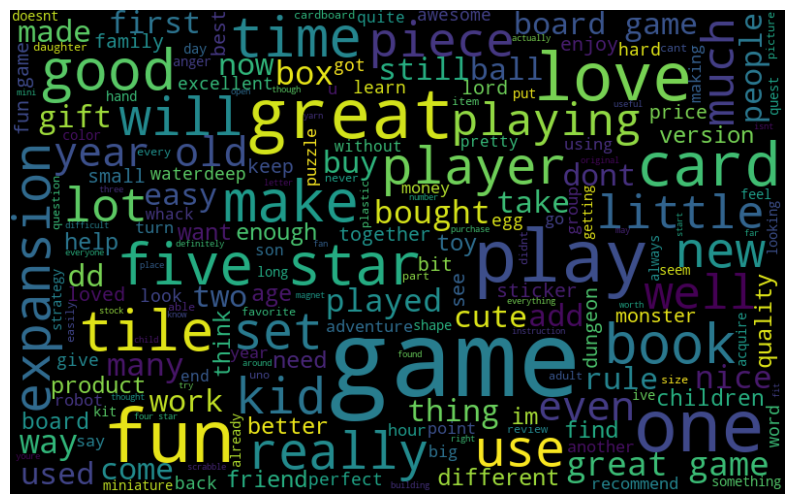

In [69]:
# Change the data to lower case and join the elements in each column (review and summary)
df['review'] = df['review'].str.lower().str.cat(df['summary'].str.lower(), sep=' ')

# Replace punctuation in each of the columns (review and summary)
df['review'] = df['review'].str.replace('[^\w\s]','')

# Drop duplicates in both columns (review and summary)
df.drop_duplicates(subset=['review'], inplace=True)

# Tokenise and create word clouds for the respective columns (separately)
def create_wordcloud(column_name):
    words = ' '.join([word for word in column_name])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

create_wordcloud(df['review'])

### Determine the frequency distribution and polarity:

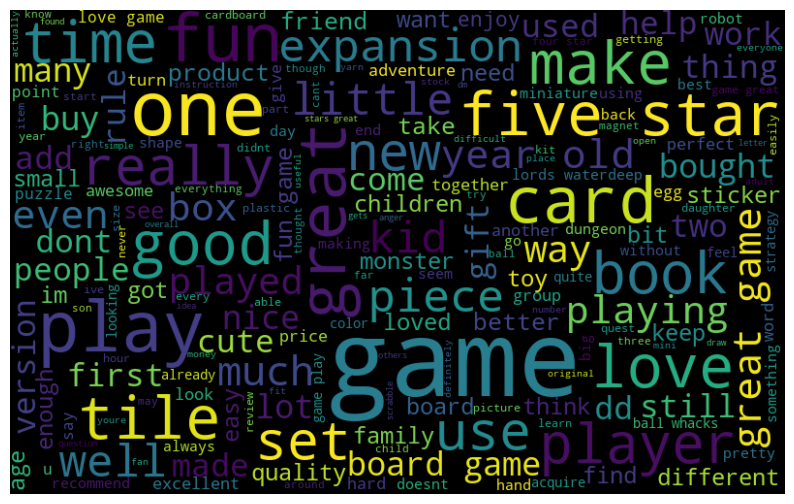

In [72]:
# Determine the frequency distribution and polarity
def create_frequency_distribution(column_name):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(' '.join(column_name.tolist()))
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if not word.lower() in stop_words]
    freq_dist = nltk.FreqDist(words)
    return freq_dist

review_freq_dist = create_frequency_distribution(df['review'])
summary_freq_dist = create_frequency_distribution(df['summary'])

# Create a word cloud without stopwords
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if not word.lower() in stop_words]
    return words

df['review_clean'] = df['review'].apply(lambda x: clean_text(x))
df['summary_clean'] = df['summary'].apply(lambda x: clean_text(x))

def create_wordcloud_cleaned(column_name):
    words = ' '.join([word for word_list in column_name for word in word_list])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

create_wordcloud_cleaned(df['review_clean'])

# Identify the 15 most common words used, and calculate their sentiment polarity
common_words = pd.DataFrame(review_freq_dist.most_common(15), columns=['word', 'frequency'])
common_words['polarity'] = common_words['word'].apply(lambda x: TextBlob(x).sentiment.polarity)

### Plot histograms of polarity for both columns:

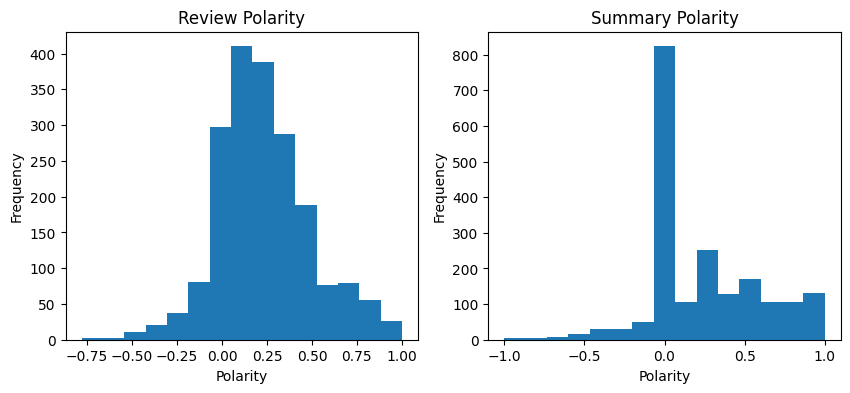

Review Polarity: 0.23210059571046765
Review Subjectivity: 0.5290095526358025
Summary Polarity: 0.23306659790150377
Summary Subjectivity: 0.38563630004667837


In [73]:
# Calculate polarity and subjectivity scores for each review and summary
df['review_polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['review_subjectivity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['summary_polarity'] = df['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['summary_subjectivity'] = df['summary'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plot histograms of polarity for review and summary columns
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(df['review_polarity'], bins=15)
ax[0].set_title('Review Polarity')
ax[0].set_xlabel('Polarity')
ax[0].set_ylabel('Frequency')
ax[1].hist(df['summary_polarity'], bins=15)
ax[1].set_title('Summary Polarity')
ax[1].set_xlabel('Polarity')
ax[1].set_ylabel('Frequency')
plt.show()

# Review the sentiment scores for the respective columns
print('Review Polarity:', df['review_polarity'].mean())
print('Review Subjectivity:', df['review_subjectivity'].mean())
print('Summary Polarity:', df['summary_polarity'].mean())
print('Summary Subjectivity:', df['summary_subjectivity'].mean())

In [75]:
# sort reviews by polarity
positive_reviews = df.sort_values('review_polarity', ascending=False)[:20]
negative_reviews = df.sort_values('review_polarity', ascending=True)[:20]

# print top 20 positive and negative reviews
print("Top 20 positive reviews:")
for review in positive_reviews['review']:
    print(review)

print("\nTop 20 negative reviews:")
for review in negative_reviews['review']:
    print(review)

# sort summaries by polarity
positive_summaries = df.sort_values('summary_polarity', ascending=False)[:20]
negative_summaries = df.sort_values('summary_polarity', ascending=True)[:20]

# print top 20 positive and negative summaries
print("\nTop 20 positive summaries:")
for summary in positive_summaries['summary']:
    print(summary)

print("\nTop 20 negative summaries:")
for summary in negative_summaries['summary']:
    print(summary)

Top 20 positive reviews:
wonderful product five stars
perfect just what i ordered five stars
awesome five stars
excellent activity for teaching selfmanagement skills five stars
my daughter loves her stickers awesome seller thank you  awesome seller thank you
wonderful for my grandson to learn the resurrection story five stars
excellent toy to simulate thought five stars
awesome set five stars
best set buy 2 if you have the means five stars
awesome addition to my rpg gm system five stars
its awesome five stars
perfect for tutoring my grandson in spelling tutoring
it is the best thing to play with and also mind blowing in some ways three stars
awesome toy five stars
this was perfect to go with the 7 bean bags  i just wish they were not separate orders five stars
awesome gift five stars
one of the best board games i played in along time five stars
delightful product five stars
awesome book five stars
came in perfect condition five stars

Top 20 negative reviews:
incomplete kit  very disap

### In this activity, we used NLP techniques to identify the most common words used in online product reviews and to determine the top 20 positive and negative reviews and summaries received from Turtle Games' website.

### We found that the most common words used in the reviews were "game", "fun", "play", "great", "set", "love", "good", "kids", "perfect", and "time". We also identified that the majority of the reviews were positive, with a polarity score of 0.2321 for reviews and 0.2331 for summaries.

### When exploring the top 20 positive reviews and summaries, we found that many of them mentioned the product being perfect or great for a specific purpose, such as teaching or playing with children. On the other hand, the negative reviews and summaries often mentioned being disappointed with the product, finding it boring or difficult to use.

### Further exploration could involve sentiment analysis on specific products or product categories to gain insights on what customers like or dislike about certain types of products. Additionally, analyzing the text in conjunction with other factors such as purchase history and demographic data could provide even more valuable insights for Turtle Games' marketing department.